# Análise exploratória da base de dados

In [876]:
# carregando os pacotes que serão utilizados
import os
import sys
import time
import pickle
import itertools
import warnings
import string
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

A base de dados utilizada é a ["English Premier League (EPL) Results"](https://www.kaggle.com/datasets/irkaal/english-premier-league-results)

Essa base contém os resultados da primeira divisão de futebol da Inglaterra desde a temporada 1993-94 até a temporada 2021-22

Para o trabalho, a temporada de interesse é a última disponível

Abaixo estão os nomes das colunas, o tipo de dado delas e a dimensão da base de dados

In [877]:
premier_league = pd.read_csv('results.csv', encoding='windows-1252')

print(premier_league.columns.values)
premier_league.shape

['Season' 'DateTime' 'HomeTeam' 'AwayTeam' 'FTHG' 'FTAG' 'FTR' 'HTHG'
 'HTAG' 'HTR' 'Referee' 'HS' 'AS' 'HST' 'AST' 'HC' 'AC' 'HF' 'AF' 'HY'
 'AY' 'HR' 'AR']


(11113, 23)

- Season ->	Match Season
- DateTime ->	Match Date and Time (yyyy-mm-dd hh:mm:ss)
- HomeTeam ->	Home Team
- AwayTeam ->	Away Team
- FTHG ->	Full Time Home Team Goals
- FTAG ->	Full Time Away Team Goals
- FTR ->	Full Time Result (H=Home Win, D=Draw, A=Away Win)
- HTHG ->	Half Time Home Team Goals
- HTAG ->	Half Time Away Team Goals
- HTR ->	Half Time Result (H=Home Win, D=Draw, A=Away Win)
- Referee ->	Match Referee
- HS ->	Home Team Shots
- AS ->	Away Team Shots
- HST ->	Home Team Shots on Target
- AST ->	Away Team Shots on Target
- HC ->	Home Team Corners
- AC ->	Away Team Corners
- HF ->	Home Team Fouls Committed
- AF ->	Away Team Fouls Committed
- HY ->	Home Team Yellow Cards
- AY ->	Away Team Yellow Cards
- HR ->	Home Team Red Cards
- AR ->	Away Team Red Cards

Como a única temporada relevante para o trabalho é a última, foram visualizados os últimos casos dessa base para saber como essa temporada está referenciada na base. 

Após isso, a última temporada da competição foi filtrada.

In [878]:
premier_league.tail()

,Season,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
11108,2021-22,2022-04-09T17:30:00Z,Aston Villa,Tottenham,0,4,A,0.0,1.0,A,...,8.0,5.0,9.0,3.0,12.0,14.0,2.0,3.0,0.0,0.0
11109,2021-22,2022-04-10T14:00:00Z,Brentford,West Ham,2,0,H,0.0,0.0,D,...,7.0,1.0,4.0,6.0,2.0,6.0,0.0,1.0,0.0,0.0
11110,2021-22,2022-04-10T14:00:00Z,Leicester,Crystal Palace,2,1,H,2.0,0.0,H,...,3.0,3.0,3.0,4.0,11.0,12.0,1.0,1.0,0.0,0.0
11111,2021-22,2022-04-10T14:00:00Z,Norwich,Burnley,2,0,H,1.0,0.0,H,...,6.0,4.0,6.0,7.0,12.0,10.0,1.0,1.0,0.0,0.0
11112,2021-22,2022-04-10T16:30:00Z,Man City,Liverpool,2,2,D,2.0,1.0,H,...,5.0,4.0,4.0,1.0,9.0,11.0,1.0,4.0,0.0,0.0


In [879]:
premier_league_filtrada = premier_league[premier_league['Season'] == '2021-22']

# conferindo o número de casos da base
premier_league_filtrada.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 309 entries, 10804 to 11112
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Season    309 non-null    object 
 1   DateTime  309 non-null    object 
 2   HomeTeam  309 non-null    object 
 3   AwayTeam  309 non-null    object 
 4   FTHG      309 non-null    int64  
 5   FTAG      309 non-null    int64  
 6   FTR       309 non-null    object 
 7   HTHG      309 non-null    float64
 8   HTAG      309 non-null    float64
 9   HTR       309 non-null    object 
 10  Referee   309 non-null    object 
 11  HS        309 non-null    float64
 12  AS        309 non-null    float64
 13  HST       309 non-null    float64
 14  AST       309 non-null    float64
 15  HC        309 non-null    float64
 16  AC        309 non-null    float64
 17  HF        309 non-null    float64
 18  AF        309 non-null    float64
 19  HY        309 non-null    float64
 20  AY        309 non-null    

In [880]:
# conferindo a existência de algum dado faltante
premier_league_filtrada.isna().sum()

Season      0
DateTime    0
HomeTeam    0
AwayTeam    0
FTHG        0
FTAG        0
FTR         0
HTHG        0
HTAG        0
HTR         0
Referee     0
HS          0
AS          0
HST         0
AST         0
HC          0
AC          0
HF          0
AF          0
HY          0
AY          0
HR          0
AR          0
dtype: int64

Algumas colunas não são vistas como relevantes para o estudo, sendo elas:

- Season, pois há somente uma temporada da competição;
- DateTime;
- HTHG (Half Time Home Team Goals);
- HTAG (Half Time Away Team Goals);
- HTR (Half Time Result);
- Referee

In [881]:
premier_league_21_22 = premier_league_filtrada[['HomeTeam', 'AwayTeam','FTHG', 'FTAG', 'FTR','HS', 'AS', 'HST', 'AST', 'HC', 'AC', 'HF', 'AF', 'HY', 'AY', 'HR', 'AR']]

premier_league_21_22

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HS,AS,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
10804,Brentford,Arsenal,2,0,H,8.0,22.0,3.0,4.0,2.0,5.0,12.0,8.0,0.0,0.0,0.0,0.0
10805,Man United,Leeds,5,1,H,16.0,10.0,8.0,3.0,5.0,4.0,11.0,9.0,1.0,2.0,0.0,0.0
10806,Burnley,Brighton,1,2,A,14.0,14.0,3.0,8.0,7.0,6.0,10.0,7.0,2.0,1.0,0.0,0.0
10807,Chelsea,Crystal Palace,3,0,H,13.0,4.0,6.0,1.0,5.0,2.0,15.0,11.0,0.0,0.0,0.0,0.0
10808,Everton,Southampton,3,1,H,14.0,6.0,6.0,3.0,6.0,8.0,13.0,15.0,2.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11108,Aston Villa,Tottenham,0,4,A,9.0,11.0,8.0,5.0,9.0,3.0,12.0,14.0,2.0,3.0,0.0,0.0
11109,Brentford,West Ham,2,0,H,15.0,5.0,7.0,1.0,4.0,6.0,2.0,6.0,0.0,1.0,0.0,0.0
11110,Leicester,Crystal Palace,2,1,H,12.0,11.0,3.0,3.0,3.0,4.0,11.0,12.0,1.0,1.0,0.0,0.0
11111,Norwich,Burnley,2,0,H,17.0,18.0,6.0,4.0,6.0,7.0,12.0,10.0,1.0,1.0,0.0,0.0


Após mais essa filtragem, será realizada a análise dos dados.

<BarContainer object of 2 artists>

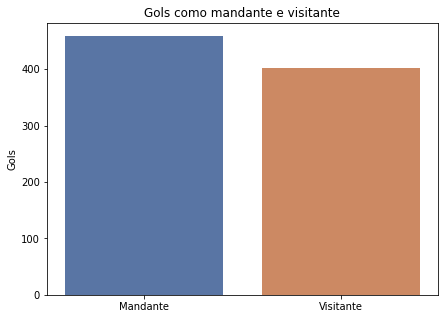

In [882]:
fig, ax = plt.subplots(figsize = (7,5))

labels = ['Mandante', 'Visitante']
bar_colors = ['#5975A4', '#CC8963']
width = 0.35
x = np.arange(len(labels))

ax.set_ylabel('Gols')
ax.set_title('Gols como mandante e visitante')
ax.set_xticks(x, labels)

plt.bar(x, [premier_league_21_22['FTHG'].sum(), premier_league_21_22['FTAG'].sum()], color = bar_colors)


O gráfico acima nos mostra a quantidade de gols que os times mandantes e os visitantes fizeram ao longo da temporada. Podemos ver que há uma diferença favorável aos mandantes.

<BarContainer object of 2 artists>

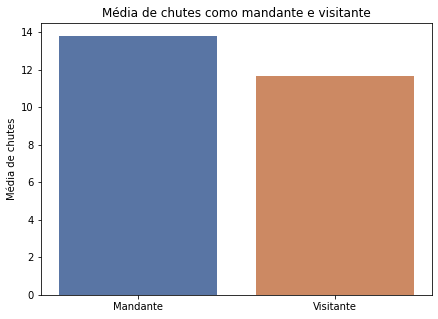

In [883]:
fig, ax = plt.subplots(figsize = (7,5))

labels = ['Mandante', 'Visitante']
bar_colors = ['#5975A4', '#CC8963']
width = 0.35
x = np.arange(len(labels))

ax.set_ylabel('Média de chutes')
ax.set_title('Média de chutes como mandante e visitante')
ax.set_xticks(x, labels)


plt.bar(x, [premier_league_21_22['HS'].mean(), premier_league_21_22['AS'].mean()], color = bar_colors)

<BarContainer object of 2 artists>

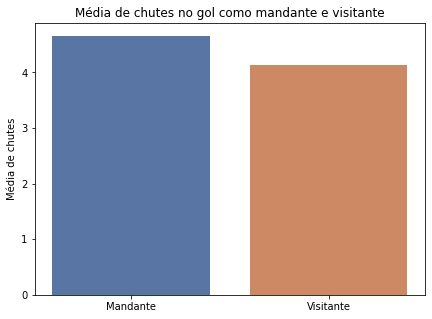

In [884]:
fig, ax = plt.subplots(figsize = (7,5))

labels = ['Mandante', 'Visitante']
bar_colors = ['#5975A4', '#CC8963']
width = 0.35
x = np.arange(len(labels))

ax.set_ylabel('Média de chutes')
ax.set_title('Média de chutes no gol como mandante e visitante')
ax.set_xticks(x, labels)


plt.bar(x, [premier_league_21_22['HST'].mean(), premier_league_21_22['AST'].mean()], color = bar_colors)

Os dois gráficos acima nos mostram a média de chutes e a média de chutes por jogo dos mandantes e dos visitantes. Assim como o primeiro gráfico, vemos uma estatística favorável aos times mandantes.

<BarContainer object of 2 artists>

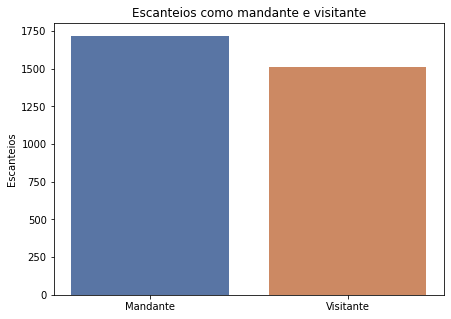

In [885]:
fig, ax = plt.subplots(figsize = (7,5))

labels = ['Mandante', 'Visitante']
bar_colors = ['#5975A4', '#CC8963']
width = 0.35
x = np.arange(len(labels))

ax.set_ylabel('Escanteios')
ax.set_title('Escanteios como mandante e visitante')
ax.set_xticks(x, labels)

plt.bar(x, [premier_league_21_22['HC'].sum(), premier_league_21_22['AC'].sum()], color = bar_colors)

Esse gráfico mostra o número de escanteios dos times mandantes e visitantes. Há uma larga diferença na quantidade de escanteios, corroborando com os dados dos gráficos de chutes anteriormente vistos.

<Figure size 1008x504 with 0 Axes>

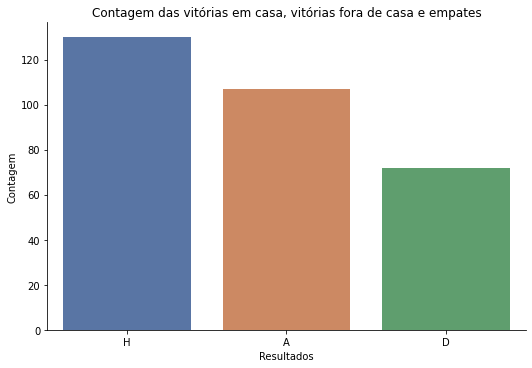

In [886]:
plt.figure(figsize = (14, 7))

ax = sns.catplot(data = premier_league_21_22, x = 'FTR', kind = 'count', palette = 'deep', aspect = 1.5)
ax.set(title = 'Contagem das vitórias em casa, vitórias fora de casa e empates',
       xlabel = 'Resultados',
       ylabel = 'Contagem');

Esse gráfico mostra a quantidade de vitórias dos times da casa (H), das vitórias dos visitantes (A) e dos empates (D). Mesmo com esses dados, não podemos dizer que qualquer time poderá ter resultados positivos na maioria dos seus jogos em casa.

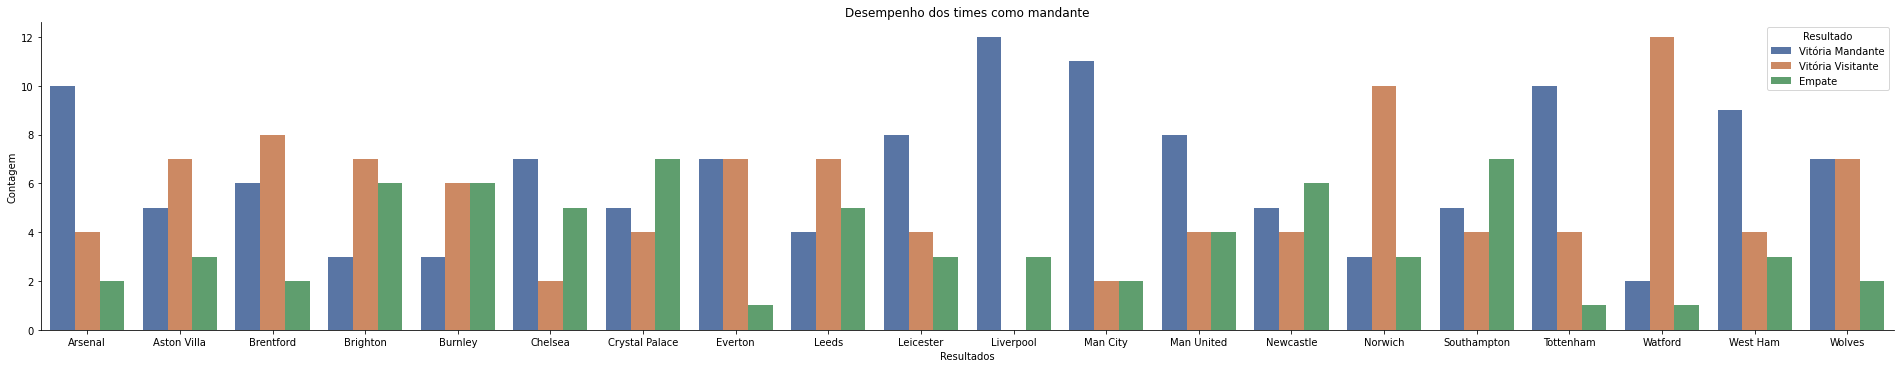

In [887]:
times = ['Arsenal', 'Aston Villa', 'Brentford', 'Brighton', 'Burnley', 'Chelsea', 'Crystal Palace', 
         'Everton', 'Leeds', 'Leicester', 'Liverpool', 'Man City', 'Man United', 'Newcastle', 'Norwich', 
         'Southampton', 'Tottenham','Watford', 'West Ham', 'Wolves']

ax = sns.catplot(data = premier_league_21_22, x = 'HomeTeam', hue =  'FTR', kind = 'count', palette = 'deep',
aspect = 5.3, order = times, legend = False)
ax.set(title = 'Desempenho dos times como mandante',
       xlabel = 'Resultados',
       ylabel = 'Contagem')
plt.legend(title = 'Resultado', loc = 'upper right', labels = ['Vitória Mandante', 'Vitória Visitante', 'Empate']);

O gráfico acima nos mostra o desempenho de cada time da Premier League quando estão em casa. Cada barra mostra o resultado da partida quando possuíam o mando de campo. Vemos que a maioria dos times têm mais vitórias do que derrotas dentro de casa, porém, há times que têm mais empates do que vitórias em casa. É interessante destacar os times que têm um desempenho muito acima dos outros, sendo eles: Arsenal, Liverpool, Manchester City e Tottenham.

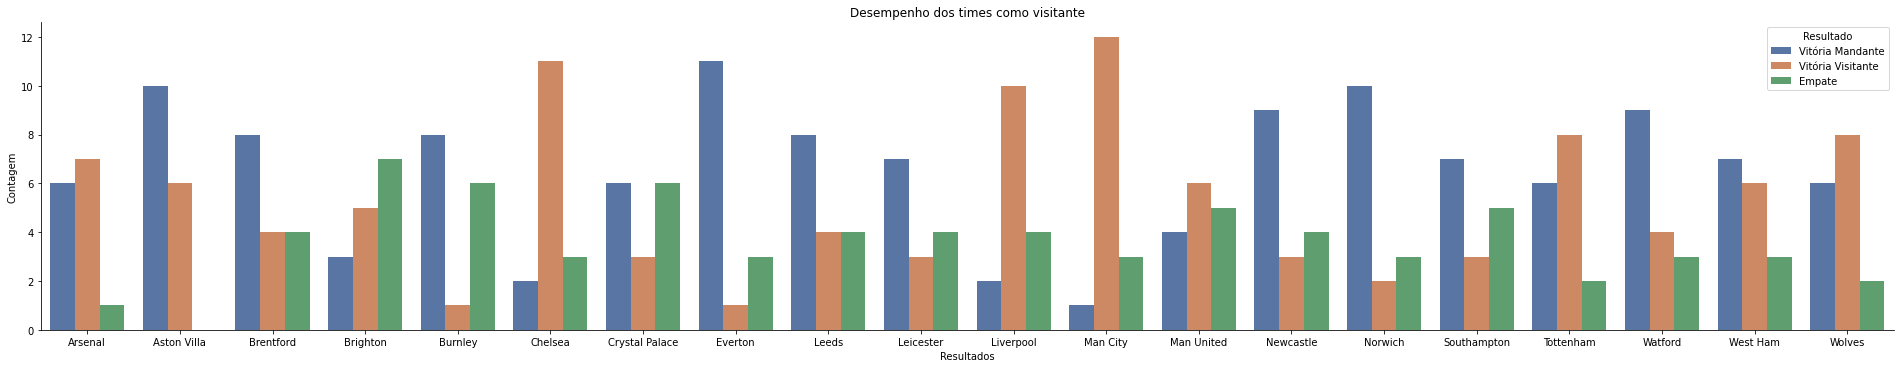

In [888]:
times = ['Arsenal', 'Aston Villa', 'Brentford', 'Brighton', 'Burnley', 'Chelsea', 'Crystal Palace', 
         'Everton', 'Leeds', 'Leicester', 'Liverpool', 'Man City', 'Man United', 'Newcastle', 'Norwich', 
         'Southampton', 'Tottenham','Watford', 'West Ham', 'Wolves']

ax = sns.catplot(data = premier_league_21_22, x = 'AwayTeam', hue =  'FTR', kind = 'count', palette = 'deep',
aspect = 5.3, order = times, legend = False)
ax.set(title = 'Desempenho dos times como visitante',
       xlabel = 'Resultados',
       ylabel = 'Contagem')
plt.legend(title = 'Resultado', loc = 'upper right', labels = ['Vitória Mandante', 'Vitória Visitante', 'Empate']);

Com relação ao resultado dos times quando estão fora de casa, vemos que, no geral, os clubes têm um pior desempenho do que quando estão visitando. Vale destacar três times com um excelente aproveitamento fora de casa: Chelsea, Liverpool e Manchester City.

<BarContainer object of 2 artists>

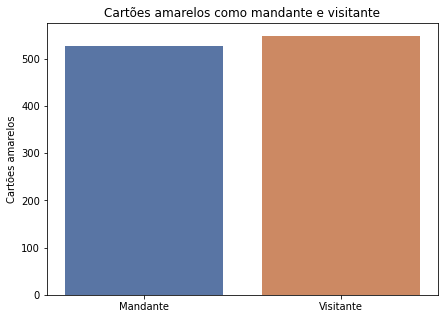

In [889]:
fig, ax = plt.subplots(figsize = (7,5))

labels = ['Mandante', 'Visitante']
bar_colors = ['#5975A4', '#CC8963']
width = 0.35
x = np.arange(len(labels))

ax.set_ylabel('Cartões amarelos')
ax.set_title('Cartões amarelos como mandante e visitante')
ax.set_xticks(x, labels)

plt.bar(x, [premier_league_21_22['HY'].sum(), premier_league_21_22['AY'].sum()], color = bar_colors)

<BarContainer object of 2 artists>

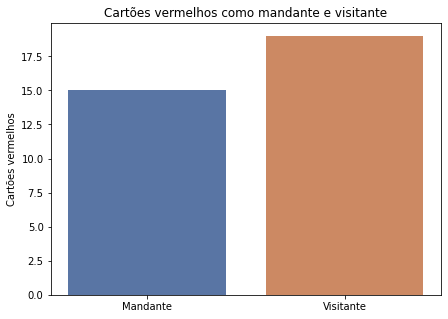

In [890]:
fig, ax = plt.subplots(figsize = (7,5))

labels = ['Mandante', 'Visitante']
bar_colors = ['#5975A4', '#CC8963']
width = 0.35
x = np.arange(len(labels))

ax.set_ylabel('Cartões vermelhos')
ax.set_title('Cartões vermelhos como mandante e visitante')
ax.set_xticks(x, labels)

plt.bar(x, [premier_league_21_22['HR'].sum(), premier_league_21_22['AR'].sum()], color = bar_colors)

Os dois gráficos acima nos mostram a quantidade de cartões amarelos e vermelhos dos times visitantes e mandantes. Podemos notar que os visitantes costumam ser mais indisciplinados que os times da casa, recebendo tanto mais cartões amarelos quanto vermelhos.

# Aprendizado

In [891]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


Diferenciar se cada time está mandando ou visitando na partida

In [892]:

premier_league_21_22['HomeTeam'] = premier_league_21_22['HomeTeam'].replace(['Arsenal'], 'Arsenal - Home')
premier_league_21_22['HomeTeam'] = premier_league_21_22['HomeTeam'].replace(['Aston Villa'], 'Aston Villa - Home')
premier_league_21_22['HomeTeam'] = premier_league_21_22['HomeTeam'].replace(['Brentford'], 'Brentford - Home')
premier_league_21_22['HomeTeam'] = premier_league_21_22['HomeTeam'].replace(['Brighton'], 'Brighton - Home')
premier_league_21_22['HomeTeam'] = premier_league_21_22['HomeTeam'].replace(['Burnley'], 'Burnley - Home')
premier_league_21_22['HomeTeam'] = premier_league_21_22['HomeTeam'].replace(['Chelsea'], 'Chelsea - Home')
premier_league_21_22['HomeTeam'] = premier_league_21_22['HomeTeam'].replace(['Crystal Palace'], 'Crystal Palace - Home')
premier_league_21_22['HomeTeam'] = premier_league_21_22['HomeTeam'].replace(['Everton'], 'Everton - Home')
premier_league_21_22['HomeTeam'] = premier_league_21_22['HomeTeam'].replace(['Leeds'], 'Leeds - Home')
premier_league_21_22['HomeTeam'] = premier_league_21_22['HomeTeam'].replace(['Leicester'], 'Leicester - Home')
premier_league_21_22['HomeTeam'] = premier_league_21_22['HomeTeam'].replace(['Liverpool'], 'Liverpool - Home')
premier_league_21_22['HomeTeam'] = premier_league_21_22['HomeTeam'].replace(['Man City'], 'Man City - Home')
premier_league_21_22['HomeTeam'] = premier_league_21_22['HomeTeam'].replace(['Man United'], 'Man United - Home')
premier_league_21_22['HomeTeam'] = premier_league_21_22['HomeTeam'].replace(['Newcastle'], 'Newcastle - Home')
premier_league_21_22['HomeTeam'] = premier_league_21_22['HomeTeam'].replace(['Norwich'], 'Norwich - Home')
premier_league_21_22['HomeTeam'] = premier_league_21_22['HomeTeam'].replace(['Southampton'], 'Southampton - Home')
premier_league_21_22['HomeTeam'] = premier_league_21_22['HomeTeam'].replace(['Tottenham'], 'Tottenham - Home')
premier_league_21_22['HomeTeam'] = premier_league_21_22['HomeTeam'].replace(['Watford'], 'Watford - Home')
premier_league_21_22['HomeTeam'] = premier_league_21_22['HomeTeam'].replace(['West Ham'], 'West Ham - Home')
premier_league_21_22['HomeTeam'] = premier_league_21_22['HomeTeam'].replace(['Wolves'], 'Wolves - Home')

premier_league_21_22.head()

C:\Users\rodri\AppData\Local\Temp\ipykernel_9468\1576305461.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  premier_league_21_22['HomeTeam'] = premier_league_21_22['HomeTeam'].replace(['Arsenal'], 'Arsenal - Home')
C:\Users\rodri\AppData\Local\Temp\ipykernel_9468\1576305461.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  premier_league_21_22['HomeTeam'] = premier_league_21_22['HomeTeam'].replace(['Aston Villa'], 'Aston Villa - Home')
C:\Users\rodri\AppData\Local\Temp\ipykernel_9468\1576305461.py:3: 

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HS,AS,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
10804,Brentford - Home,Arsenal,2,0,H,8.0,22.0,3.0,4.0,2.0,5.0,12.0,8.0,0.0,0.0,0.0,0.0
10805,Man United - Home,Leeds,5,1,H,16.0,10.0,8.0,3.0,5.0,4.0,11.0,9.0,1.0,2.0,0.0,0.0
10806,Burnley - Home,Brighton,1,2,A,14.0,14.0,3.0,8.0,7.0,6.0,10.0,7.0,2.0,1.0,0.0,0.0
10807,Chelsea - Home,Crystal Palace,3,0,H,13.0,4.0,6.0,1.0,5.0,2.0,15.0,11.0,0.0,0.0,0.0,0.0
10808,Everton - Home,Southampton,3,1,H,14.0,6.0,6.0,3.0,6.0,8.0,13.0,15.0,2.0,0.0,0.0,0.0


In [893]:
premier_league_21_22['AwayTeam'] = premier_league_21_22['AwayTeam'].replace(['Arsenal'], 'Arsenal - Away')
premier_league_21_22['AwayTeam'] = premier_league_21_22['AwayTeam'].replace(['Aston Villa'], 'Aston Villa - Away')
premier_league_21_22['AwayTeam'] = premier_league_21_22['AwayTeam'].replace(['Brentford'], 'Brentford - Away')
premier_league_21_22['AwayTeam'] = premier_league_21_22['AwayTeam'].replace(['Brighton'], 'Brighton - Away')
premier_league_21_22['AwayTeam'] = premier_league_21_22['AwayTeam'].replace(['Burnley'], 'Burnley - Away')
premier_league_21_22['AwayTeam'] = premier_league_21_22['AwayTeam'].replace(['Chelsea'], 'Chelsea - Away')
premier_league_21_22['AwayTeam'] = premier_league_21_22['AwayTeam'].replace(['Crystal Palace'], 'Crystal Palace - Away')
premier_league_21_22['AwayTeam'] = premier_league_21_22['AwayTeam'].replace(['Everton'], 'Everton - Away')
premier_league_21_22['AwayTeam'] = premier_league_21_22['AwayTeam'].replace(['Leeds'], 'Leeds - Away')
premier_league_21_22['AwayTeam'] = premier_league_21_22['AwayTeam'].replace(['Leicester'], 'Leicester - Away')
premier_league_21_22['AwayTeam'] = premier_league_21_22['AwayTeam'].replace(['Liverpool'], 'Liverpool - Away')
premier_league_21_22['AwayTeam'] = premier_league_21_22['AwayTeam'].replace(['Man City'], 'Man City - Away')
premier_league_21_22['AwayTeam'] = premier_league_21_22['AwayTeam'].replace(['Man United'], 'Man United - Away')
premier_league_21_22['AwayTeam'] = premier_league_21_22['AwayTeam'].replace(['Newcastle'], 'Newcastle - Away')
premier_league_21_22['AwayTeam'] = premier_league_21_22['AwayTeam'].replace(['Norwich'], 'Norwich - Away')
premier_league_21_22['AwayTeam'] = premier_league_21_22['AwayTeam'].replace(['Southampton'], 'Southampton - Away')
premier_league_21_22['AwayTeam'] = premier_league_21_22['AwayTeam'].replace(['Tottenham'], 'Tottenham - Away')
premier_league_21_22['AwayTeam'] = premier_league_21_22['AwayTeam'].replace(['Watford'], 'Watford - Away')
premier_league_21_22['AwayTeam'] = premier_league_21_22['AwayTeam'].replace(['West Ham'], 'West Ham - Away')
premier_league_21_22['AwayTeam'] = premier_league_21_22['AwayTeam'].replace(['Wolves'], 'Wolves - Away')

premier_league_21_22.head()

C:\Users\rodri\AppData\Local\Temp\ipykernel_9468\1881648608.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  premier_league_21_22['AwayTeam'] = premier_league_21_22['AwayTeam'].replace(['Arsenal'], 'Arsenal - Away')
C:\Users\rodri\AppData\Local\Temp\ipykernel_9468\1881648608.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  premier_league_21_22['AwayTeam'] = premier_league_21_22['AwayTeam'].replace(['Aston Villa'], 'Aston Villa - Away')
C:\Users\rodri\AppData\Local\Temp\ipykernel_9468\1881648608.py:3: 

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HS,AS,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
10804,Brentford - Home,Arsenal - Away,2,0,H,8.0,22.0,3.0,4.0,2.0,5.0,12.0,8.0,0.0,0.0,0.0,0.0
10805,Man United - Home,Leeds - Away,5,1,H,16.0,10.0,8.0,3.0,5.0,4.0,11.0,9.0,1.0,2.0,0.0,0.0
10806,Burnley - Home,Brighton - Away,1,2,A,14.0,14.0,3.0,8.0,7.0,6.0,10.0,7.0,2.0,1.0,0.0,0.0
10807,Chelsea - Home,Crystal Palace - Away,3,0,H,13.0,4.0,6.0,1.0,5.0,2.0,15.0,11.0,0.0,0.0,0.0,0.0
10808,Everton - Home,Southampton - Away,3,1,H,14.0,6.0,6.0,3.0,6.0,8.0,13.0,15.0,2.0,0.0,0.0,0.0


In [894]:
premier_league_21_22.head()

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HS,AS,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
10804,Brentford - Home,Arsenal - Away,2,0,H,8.0,22.0,3.0,4.0,2.0,5.0,12.0,8.0,0.0,0.0,0.0,0.0
10805,Man United - Home,Leeds - Away,5,1,H,16.0,10.0,8.0,3.0,5.0,4.0,11.0,9.0,1.0,2.0,0.0,0.0
10806,Burnley - Home,Brighton - Away,1,2,A,14.0,14.0,3.0,8.0,7.0,6.0,10.0,7.0,2.0,1.0,0.0,0.0
10807,Chelsea - Home,Crystal Palace - Away,3,0,H,13.0,4.0,6.0,1.0,5.0,2.0,15.0,11.0,0.0,0.0,0.0,0.0
10808,Everton - Home,Southampton - Away,3,1,H,14.0,6.0,6.0,3.0,6.0,8.0,13.0,15.0,2.0,0.0,0.0,0.0


In [895]:
# separando os modelos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(premier_league_21_22.drop('FTR', axis = 1), premier_league_21_22['FTR'], test_size= 0.2)

X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(247, 16)
(62, 16)
(247,)
(62,)


In [896]:
X_train.head()

,HomeTeam,AwayTeam,FTHG,FTAG,HS,AS,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
0,Crystal Palace - Home,Wolves - Away,2,0,13.0,4.0,6.0,2.0,4.0,6.0,14.0,13.0,2.0,1.0,0.0,0.0
1,Aston Villa - Home,Brentford - Away,1,1,7.0,9.0,5.0,2.0,3.0,2.0,15.0,14.0,3.0,3.0,0.0,0.0
2,Wolves - Home,Everton - Away,2,1,10.0,14.0,4.0,5.0,4.0,3.0,10.0,8.0,1.0,1.0,0.0,0.0
3,Watford - Home,Aston Villa - Away,3,2,13.0,11.0,7.0,2.0,2.0,4.0,18.0,13.0,3.0,1.0,0.0,0.0
4,Leeds - Home,Crystal Palace - Away,1,0,15.0,9.0,3.0,1.0,7.0,4.0,15.0,15.0,5.0,3.0,0.0,0.0


Codificando os times

In [897]:
ohe = OneHotEncoder()

In [898]:
ohe.fit(X_train['AwayTeam'].values.reshape(-1, 1))

OneHotEncoder()

In [899]:
away_team_train = pd.DataFrame(ohe.transform(X_train['AwayTeam'].values.reshape(-1, 1)).toarray(), columns = ohe.categories_[0], dtype=np.int8)
away_team_test = pd.DataFrame(ohe.transform(X_test['AwayTeam'].values.reshape(-1, 1)).toarray(), columns = ohe.categories_[0], dtype=np.int8)

In [900]:
X_train.drop(['AwayTeam'], axis=1, inplace=True)
X_train = pd.concat([X_train, away_team_train], axis=1)
X_test.drop(['AwayTeam'], axis=1, inplace=True)
X_test = pd.concat([X_test, away_team_test], axis=1)
X_train.head(5)

,HomeTeam,FTHG,FTAG,HS,AS,HST,AST,HC,AC,HF,...,Liverpool - Away,Man City - Away,Man United - Away,Newcastle - Away,Norwich - Away,Southampton - Away,Tottenham - Away,Watford - Away,West Ham - Away,Wolves - Away
0,Crystal Palace - Home,2,0,13.0,4.0,6.0,2.0,4.0,6.0,14.0,...,0,0,0,0,0,0,0,0,0,1
1,Aston Villa - Home,1,1,7.0,9.0,5.0,2.0,3.0,2.0,15.0,...,0,0,0,0,0,0,0,0,0,0
2,Wolves - Home,2,1,10.0,14.0,4.0,5.0,4.0,3.0,10.0,...,0,0,0,0,0,0,0,0,0,0
3,Watford - Home,3,2,13.0,11.0,7.0,2.0,2.0,4.0,18.0,...,0,0,0,0,0,0,0,0,0,0
4,Leeds - Home,1,0,15.0,9.0,3.0,1.0,7.0,4.0,15.0,...,0,0,0,0,0,0,0,0,0,0


In [901]:
ohe.fit(X_train['HomeTeam'].values.reshape(-1, 1))

OneHotEncoder()

In [902]:
home_team_train = pd.DataFrame(ohe.transform(X_train['HomeTeam'].values.reshape(-1, 1)).toarray(), columns = ohe.categories_[0], dtype=np.int8)
home_team_test = pd.DataFrame(ohe.transform(X_test['HomeTeam'].values.reshape(-1, 1)).toarray(), columns = ohe.categories_[0], dtype=np.int8)

In [903]:
X_train.drop(['HomeTeam'], axis=1, inplace=True)
X_train = pd.concat([X_train, home_team_train], axis=1)
X_test.drop(['HomeTeam'], axis=1, inplace=True)
X_test = pd.concat([X_test, home_team_test], axis=1)
X_train.head(5)

,FTHG,FTAG,HS,AS,HST,AST,HC,AC,HF,AF,...,Liverpool - Home,Man City - Home,Man United - Home,Newcastle - Home,Norwich - Home,Southampton - Home,Tottenham - Home,Watford - Home,West Ham - Home,Wolves - Home
0,2,0,13.0,4.0,6.0,2.0,4.0,6.0,14.0,13.0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,7.0,9.0,5.0,2.0,3.0,2.0,15.0,14.0,...,0,0,0,0,0,0,0,0,0,0
2,2,1,10.0,14.0,4.0,5.0,4.0,3.0,10.0,8.0,...,0,0,0,0,0,0,0,0,0,1
3,3,2,13.0,11.0,7.0,2.0,2.0,4.0,18.0,13.0,...,0,0,0,0,0,0,0,1,0,0
4,1,0,15.0,9.0,3.0,1.0,7.0,4.0,15.0,15.0,...,0,0,0,0,0,0,0,0,0,0


Padronizando as escalas

In [904]:
scaler = StandardScaler()

for column in X_train.columns:
    scaler.fit(X_train[column].values.reshape(-1, 1))
    X_train[column] = scaler.transform(X_train[column].values.reshape(-1, 1))
    X_test[column] = scaler.transform(X_test[column].values.reshape(-1, 1))

X_train.head()


,FTHG,FTAG,HS,AS,HST,AST,HC,AC,HF,AF,...,Liverpool - Home,Man City - Home,Man United - Home,Newcastle - Home,Norwich - Home,Southampton - Home,Tottenham - Home,Watford - Home,West Ham - Home,Wolves - Home
0,0.352675,-0.995183,-0.132470,-1.442221,0.478435,-0.782757,-0.490342,0.372279,1.085274,0.719628,...,-0.245124,-0.225973,-0.205412,-0.245124,-0.225973,-0.194461,-0.245124,-0.225973,-0.245124,-0.263181
1,-0.391861,-0.183928,-1.199431,-0.482036,0.106820,-0.782757,-0.839375,-1.081521,1.361913,0.992667,...,-0.245124,-0.225973,-0.205412,-0.245124,-0.225973,-0.194461,-0.245124,-0.225973,-0.245124,-0.263181
2,0.352675,-0.183928,-0.665950,0.478149,-0.264794,0.359020,-0.490342,-0.718071,-0.021280,-0.645565,...,-0.245124,-0.225973,-0.205412,-0.245124,-0.225973,-0.194461,-0.245124,-0.225973,-0.245124,3.799671
3,1.097212,0.627326,-0.132470,-0.097962,0.850050,-0.782757,-1.188408,-0.354621,2.191829,0.719628,...,-0.245124,-0.225973,-0.205412,-0.245124,-0.225973,-0.194461,-0.245124,4.425306,-0.245124,-0.263181
4,-0.391861,-0.995183,0.223183,-0.482036,-0.636409,-1.163349,0.556757,-0.354621,1.361913,1.265706,...,-0.245124,-0.225973,-0.205412,-0.245124,-0.225973,-0.194461,-0.245124,-0.225973,-0.245124,-0.263181


### Regresão Logística

In [905]:
lg_reg = LogisticRegression()

lg_reg.fit(X_train, y_train)

LogisticRegression()

In [906]:
y_reg_pred = lg_reg.predict(X_test)

In [907]:
y_reg_pred[:10]

array(['D', 'A', 'A', 'A', 'H', 'H', 'A', 'H', 'H', 'D'], dtype=object)

In [908]:
lg_reg.score(X_test, y_test)

0.8064516129032258

### KNN

In [909]:
knn = KNeighborsClassifier()

knn.fit(X_train, y_train)

KNeighborsClassifier()

In [910]:
y_knn_pred = knn.predict(X_test)

y_knn_pred[:10]

array(['D', 'A', 'A', 'A', 'H', 'H', 'A', 'H', 'H', 'D'], dtype=object)

In [911]:
knn.score(X_test, y_test)

0.6290322580645161

### Random Forest Classifier

In [912]:
rfc = RandomForestClassifier()

rfc.fit(X_train, y_train)

RandomForestClassifier()

In [913]:
y_rfc_pred = knn.predict(X_test)

y_rfc_pred[:10]

array(['D', 'A', 'A', 'A', 'H', 'H', 'A', 'H', 'H', 'D'], dtype=object)

In [914]:
rfc.score(X_test, y_test)

0.8709677419354839

In [915]:
print(f'O Score da Regressão Logística é : {lg_reg.score(X_test, y_test)}')
print(f'O Score de KNN é : {knn.score(X_test, y_test)}')
print(f'O Score do Random Forest Classifier é : {rfc.score(X_test, y_test)}')

O Score da Regressão Logística é : 0.8064516129032258
O Score de KNN é : 0.6290322580645161
O Score do Random Forest Classifier é : 0.8709677419354839
